In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [118]:
df = pd.read_csv('steel_strength.csv')
df.head()

,formula,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti,yield strength,tensile strength,elongation
0,Fe0.620C0.000953Mn0.000521Si0.00102Cr0.000110N...,0.02,0.05,0.05,0.01,19.70,2.95,0.01,0.00,0.01,15.00,0.00,0.15,1.55,2411.5,2473.5,7.0
1,Fe0.623C0.00854Mn0.000104Si0.000203Cr0.147Ni0....,0.18,0.01,0.01,13.44,0.01,3.01,0.46,0.04,0.01,19.46,2.35,0.04,0.00,1123.1,1929.2,8.0
2,Fe0.625Mn0.000102Si0.000200Cr0.0936Ni0.129Mo0....,0.00,0.01,0.01,8.67,13.45,0.82,0.01,0.00,0.01,13.90,0.00,0.39,0.57,1736.3,1871.8,NaN
3,Fe0.634C0.000478Mn0.000523Si0.00102Cr0.000111N...,0.01,0.05,0.05,0.01,17.70,3.95,0.01,0.00,0.01,15.00,0.00,0.13,1.47,2487.3,2514.9,9.0
4,Fe0.636C0.000474Mn0.000518Si0.00101Cr0.000109N...,0.01,0.05,0.05,0.01,19.40,1.45,0.01,0.00,0.01,14.90,0.00,0.13,1.55,2249.6,2315.0,8.5


In [119]:
df.drop(["yield strength", "elongation"], axis=1, inplace=True)
df.head()

,formula,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti,tensile strength
0,Fe0.620C0.000953Mn0.000521Si0.00102Cr0.000110N...,0.02,0.05,0.05,0.01,19.70,2.95,0.01,0.00,0.01,15.00,0.00,0.15,1.55,2473.5
1,Fe0.623C0.00854Mn0.000104Si0.000203Cr0.147Ni0....,0.18,0.01,0.01,13.44,0.01,3.01,0.46,0.04,0.01,19.46,2.35,0.04,0.00,1929.2
2,Fe0.625Mn0.000102Si0.000200Cr0.0936Ni0.129Mo0....,0.00,0.01,0.01,8.67,13.45,0.82,0.01,0.00,0.01,13.90,0.00,0.39,0.57,1871.8
3,Fe0.634C0.000478Mn0.000523Si0.00102Cr0.000111N...,0.01,0.05,0.05,0.01,17.70,3.95,0.01,0.00,0.01,15.00,0.00,0.13,1.47,2514.9
4,Fe0.636C0.000474Mn0.000518Si0.00101Cr0.000109N...,0.01,0.05,0.05,0.01,19.40,1.45,0.01,0.00,0.01,14.90,0.00,0.13,1.55,2315.0


In [120]:
df.drop("formula", axis=1, inplace=True)
df.head()

,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti,tensile strength
0,0.02,0.05,0.05,0.01,19.70,2.95,0.01,0.00,0.01,15.00,0.00,0.15,1.55,2473.5
1,0.18,0.01,0.01,13.44,0.01,3.01,0.46,0.04,0.01,19.46,2.35,0.04,0.00,1929.2
2,0.00,0.01,0.01,8.67,13.45,0.82,0.01,0.00,0.01,13.90,0.00,0.39,0.57,1871.8
3,0.01,0.05,0.05,0.01,17.70,3.95,0.01,0.00,0.01,15.00,0.00,0.13,1.47,2514.9
4,0.01,0.05,0.05,0.01,19.40,1.45,0.01,0.00,0.01,14.90,0.00,0.13,1.55,2315.0


In [121]:
correlation_matrix = df.corr()["tensile strength"].sort_values(ascending=False)
correlation_matrix

tensile strength    1.000000
co                  0.545468
c                   0.494562
v                   0.253418
ti                  0.248399
mo                  0.223331
n                   0.176937
nb                  0.048747
w                   0.030604
si                 -0.070440
cr                 -0.090312
mn                 -0.132948
ni                 -0.201072
al                 -0.273217
Name: tensile strength, dtype: float64

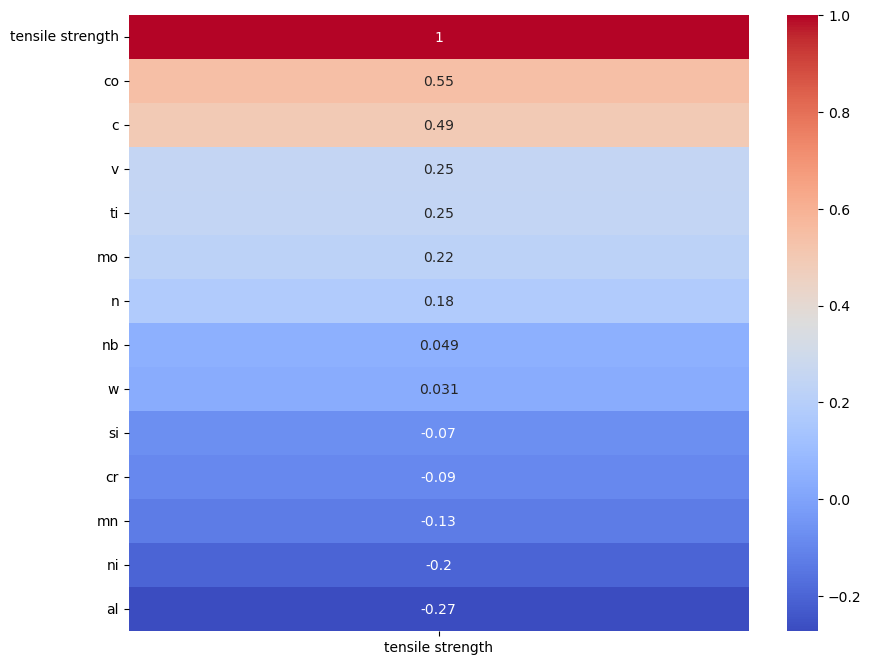

In [122]:
correlation_with_target_df = correlation_matrix.to_frame()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_with_target_df, annot=True, cmap='coolwarm')
plt.show()

The heatmap shows that tensile strength highly depends on cobalt and carbon content of the steel. It is somehow dependendent on molybdenum, titanium and nitrogen content.

In [123]:
df_new = df.drop(["nb", "w", "si", "cr"], axis=1)
df_new.head()

,c,mn,ni,mo,v,n,co,al,ti,tensile strength
0,0.02,0.05,19.70,2.95,0.01,0.00,15.00,0.15,1.55,2473.5
1,0.18,0.01,0.01,3.01,0.46,0.04,19.46,0.04,0.00,1929.2
2,0.00,0.01,13.45,0.82,0.01,0.00,13.90,0.39,0.57,1871.8
3,0.01,0.05,17.70,3.95,0.01,0.00,15.00,0.13,1.47,2514.9
4,0.01,0.05,19.40,1.45,0.01,0.00,14.90,0.13,1.55,2315.0


In [124]:
df_new[df["n"]>0].shape[0]

43

In [125]:
df_new.isna().sum()

c                   0
mn                  0
ni                  0
mo                  0
v                   0
n                   0
co                  0
al                  0
ti                  0
tensile strength    0
dtype: int64

In [126]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
X = df_new.drop("tensile strength", axis=1)
y = df_new["tensile strength"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[ 0.97761784, -0.33015194, -1.14941831, ...,  1.11632582,
        -0.6165104 , -0.57877056],
       [-0.7533365 , -0.33015194,  1.98559661, ..., -1.10342185,
        -0.31929629,  2.67243287],
       [-0.20671934,  1.19269331, -0.23220071, ..., -1.10342185,
         2.86089473, -0.57877056],
       ...,
       [-0.66223364, -0.33015194,  0.955905  , ...,  1.37028681,
        -0.6165104 ,  0.12280492],
       [-0.7533365 , -0.14947538,  0.57729531, ..., -1.10342185,
         0.98844581, -0.23653862],
       [ 0.97761784, -0.33015194, -1.16209144, ...,  1.10346703,
        -0.6165104 , -0.57877056]])

In [127]:
# apply random forest regressor to the scaled data
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
model = RandomForestRegressor()


In [128]:
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

117.80823529511505

In [129]:
model.score(X_test_scaled, y_test)

0.8626746937356142

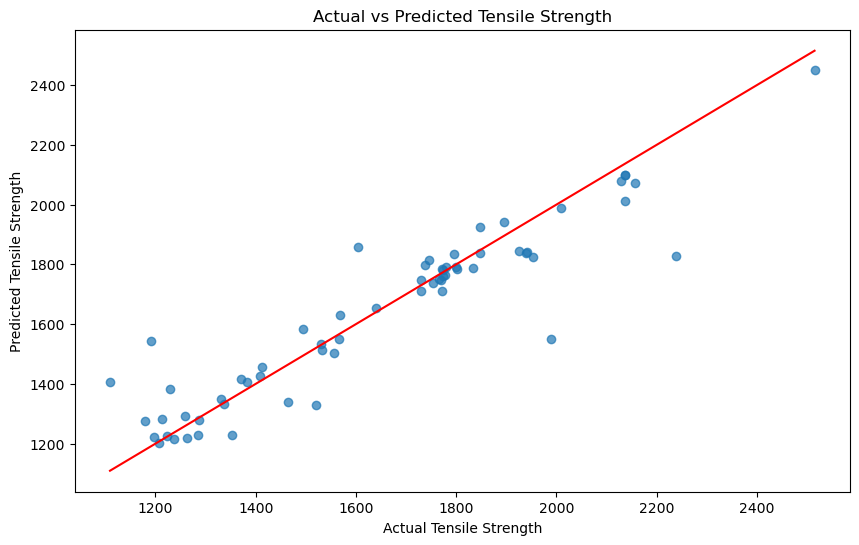

In [130]:
# Scatter plot of Actual vs Predicted Tensile Strength
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Tensile Strength')
plt.ylabel('Predicted Tensile Strength')
plt.title('Actual vs Predicted Tensile Strength')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line of perfect prediction
plt.show()